In [1]:
import os
os.chdir('/home/jupyter/ntu/csie-cv/hw3')
from PIL import Image
import numpy as np
import copy
from collections import defaultdict
import cv2

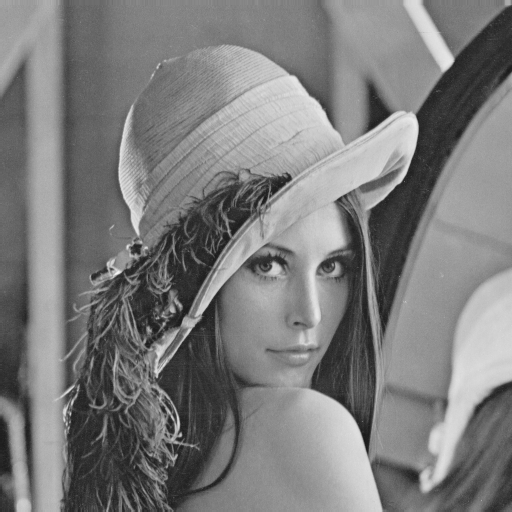

In [2]:
img = Image.open('./lena.bmp')
img

In [3]:
img_array = np.array(img)
width, height = img_array.shape
img_list = img_array.tolist()

# a. histogram

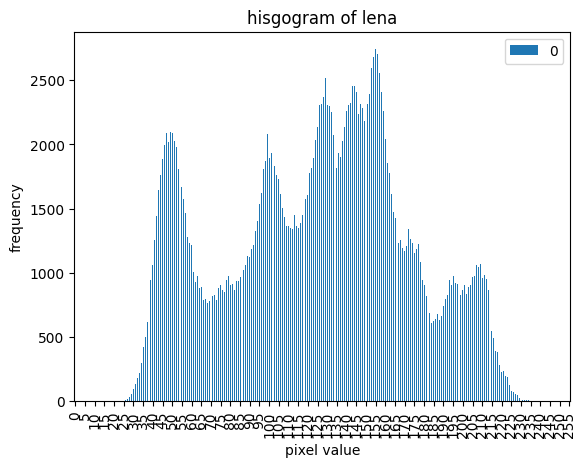

In [4]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


result = img_array.copy()
histogram = {i:0 for i in range(0, 256)}

for y in range(height):
    for x in range(width):
        bin = histogram.get(result[y][x], 0)
        histogram[result[y][x]]  = bin + 1

histogram = dict(sorted(histogram.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in histogram.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='hisgogram of lena', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('histogram.png')

# b. image intensity div by 3, then histogram

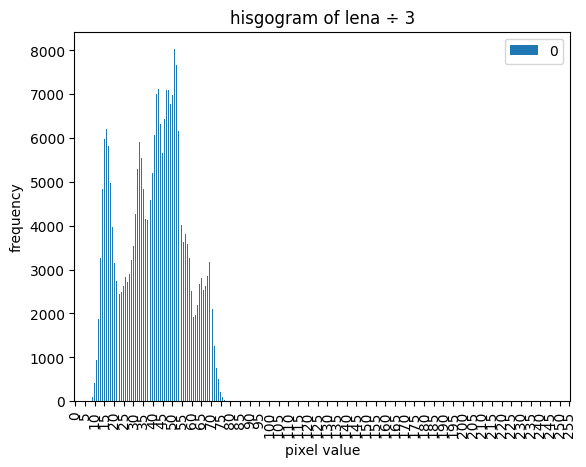

In [5]:
result = img_array.copy()
histogram = {i:0 for i in range(0, 256)}

for y in range(height):
    for x in range(width):
        result[y][x] = result[y][x]//3
        bin = histogram.get(result[y][x], 0)
        histogram[result[y][x]]  = bin + 1

histogram = dict(sorted(histogram.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in histogram.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='hisgogram of lena ÷ 3', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('histogram_div3.png')

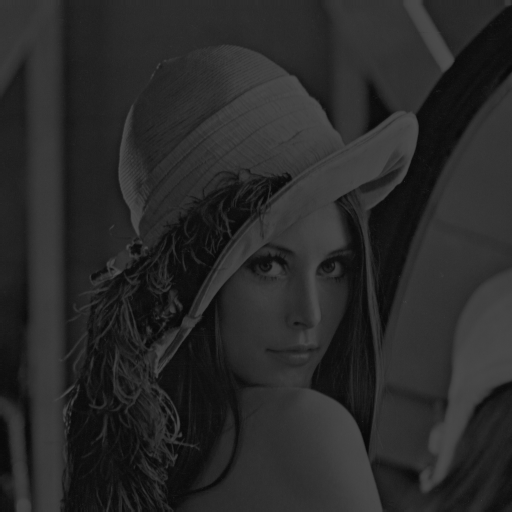

In [59]:
img_ = Image.fromarray(np.array(result, dtype='uint8'), mode='L')
img_.save('./lena_div3.bmp')
img_

# c. histogram equalization on b.

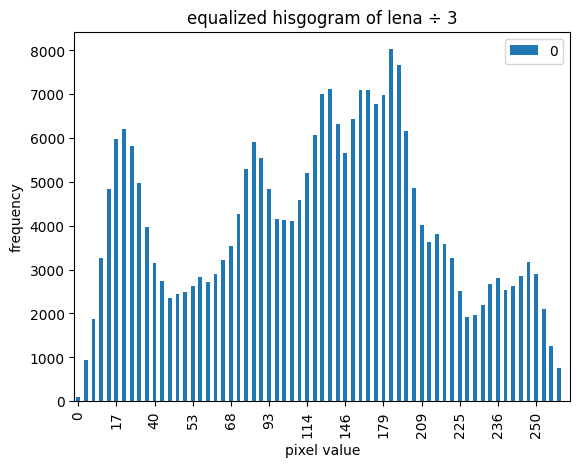

In [6]:
result = img_array.copy()

# remove value = 0's key-value pair
for k, v in list(histogram.items()):
    if v == 0:
        del histogram[k]

# sort by key
histogram = sorted(histogram.items(), key = lambda x: x[0])
min_bin, min_bin_count = histogram[0]
histogram = dict(histogram)


# direct map min_bin to 0
equalized = {i:0 for i in range(0, 256)}
equalized = {0:min_bin_count}
cdf = 0

for i, (k, v) in enumerate(histogram.items()):
    # min_bin has already mapped to 0
    if i == 0:
        continue

    cdf += v
    hv = round(
        ((cdf - min_bin_count)/(height*width - min_bin_count))*255
        )   
    equalized[hv] = v


equalized = dict(sorted(equalized.items(), key=lambda x: x[0]))
df = pd.DataFrame({k:[v] for k,v in equalized.items()}).T#.plot.bar(x='lab', y='val', rot=0)

ax = df.plot.bar(title='equalized hisgogram of lena ÷ 3', xlabel='pixel value', ylabel='frequency')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.savefig('equalized_histogram_div3.png')